In [55]:
# pip install -U scikit-learn scipy matplotlib
# !pip install seaborn
# !pip install statsmodels

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
# load Emiliani2 dataset and set date index
dfregion = pd.read_csv("./csv/Emiliani2.csv")
dfregion = dfregion.rename(columns={'Unnamed: 0': 'date'})
dfregion['date'] = pd.to_datetime(dfregion['date'], format='%Y/%m/%d')
dfregion = dfregion.set_index('date')
dfregion = dfregion.asfreq('8D')
dfregion.head()

,mean,median,year,week
date,,,,
2001-01-05,0.214281,0.00,2001,1
2001-01-13,0.484737,0.52,2001,2
2001-01-21,0.466071,0.47,2001,3
2001-01-29,0.417470,0.44,2001,5
2001-02-06,0.492202,0.53,2001,6


In [59]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = '{:.20f}'.format(value)
    print (kpss_output)

In [60]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    result = adfuller(timeseries, autolag="AIC")
    
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# 2013

In [61]:
dfregion_2013 = dfregion[dfregion['year'] == 2013]

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

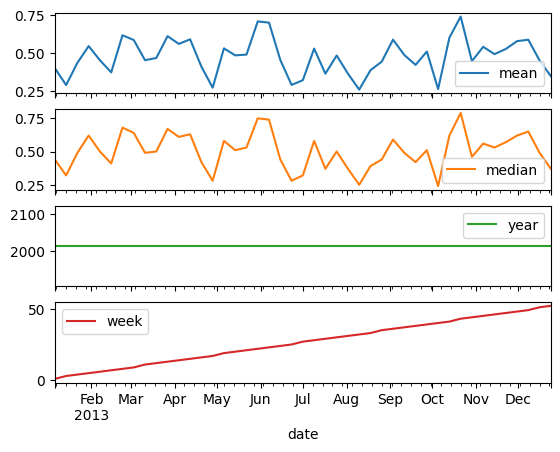

In [62]:
dfregion_2013.plot(subplots=True)

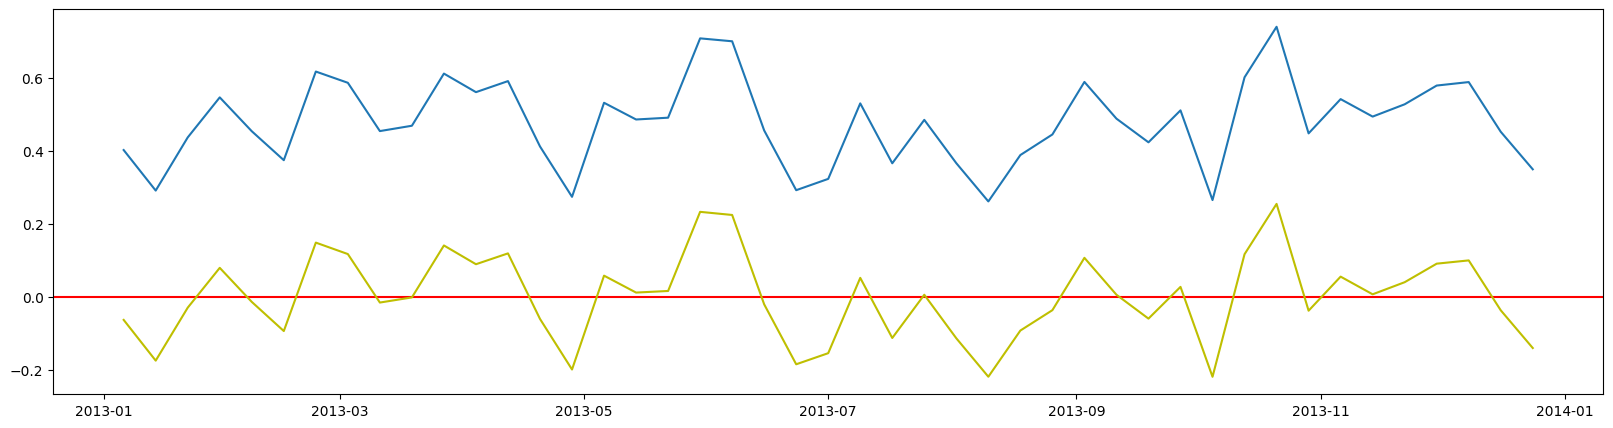

In [63]:
from scipy.signal import detrend

fig,ax= plt.subplots(figsize=(20,5))
ax.axhline(y=0,color='r')
ax.plot(dfregion_2013.index,dfregion_2013['mean'])
ax.plot(dfregion_2013.index,detrend(dfregion_2013['mean']), color='y')

### Regression with incremetal range to study stationarity

In [71]:
dfregion_2013_regr = pd.read_csv("./csv/Emiliani2.csv")
dfregion_2013_regr = dfregion_2013_regr.rename(columns={'Unnamed: 0': 'date'})
dfregion_2013_regr = dfregion_2013_regr[dfregion_2013_regr['year'] == 2013]

meanOfMean = dfregion_2013_regr['mean'].mean()
dfregion_2013_regr['meanAnomaly'] = dfregion_2013_regr['mean'].subtract(meanOfMean)

dfregion_2013_regr = dfregion_2013_regr.reset_index(drop = True)

In [72]:
y = dfregion_2013_regr['meanAnomaly']
X = dfregion_2013_regr.index.values
X = X.reshape(X.shape[0], 1)

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X, y)

print('Coefficients: \n', '{:.20f}'.format(regression.coef_[0]), regression.intercept_)

Coefficients: 
 0.00055263646903820835 -0.012158002318840523


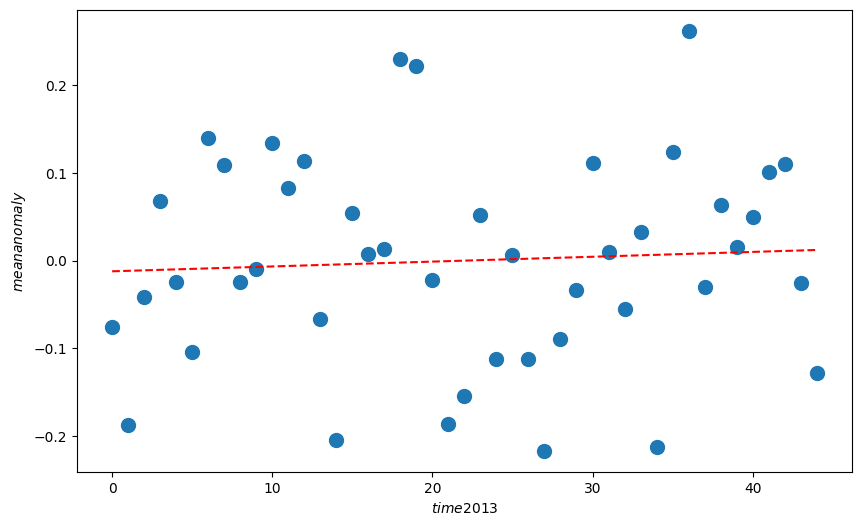

In [48]:
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
best_fit = regression.intercept_ + regression.coef_[0] * X

ax_scat.scatter(X, y, s=100, label='Data')
ax_scat.plot(X, best_fit, ls='--', label='Best Fit Line', color='red')

ax_scat.set_xlabel(r'$time2013$')
ax_scat.set_ylabel(r'$meananomaly$');

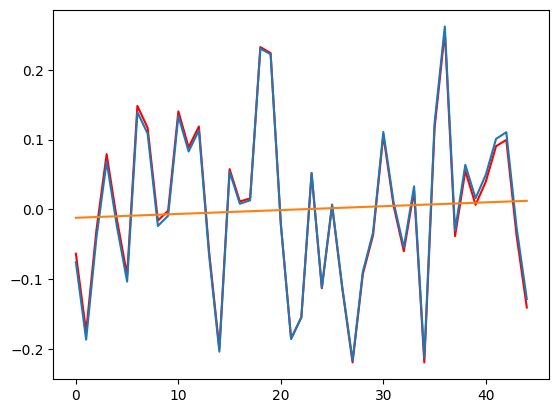

In [73]:
trend = regression.predict(X)  # values of the red dotted line (best fit line) above
detrended = [y[i]-trend[i] for i in range(0, len(X))]

plt.plot(detrended, color='red')
plt.plot(y)
plt.plot(trend)
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

#### Stationarity tests (OK)

In [74]:
adf_test(dfregion_2013_regr['meanAnomaly']) # for stationarity: p_value < 0.05

Results of Dickey-Fuller Test:
ADF Statistic: -4.978195
p-value: 0.000025
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603


In [75]:
kpss_test(dfregion_2013_regr['meanAnomaly']) # for stationarity: p_value > 0.05

Results of KPSS Test:
Test Statistic                         0.074191
p-value                                     0.1
#Lags Used                                  1.0
Critical Value (10%)     0.34699999999999997513
Critical Value (5%)      0.46300000000000002265
Critical Value (2.5%)    0.57399999999999995470
Critical Value (1%)      0.73899999999999999023
dtype: object


/Users/veronica/anaconda3/envs/openeo/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## 2018-2022

In [6]:
dfregion_1922 = dfregion[dfregion['year'] >= 2019].copy()

meanOfMean = dfregion_1922['mean'].mean()
dfregion_1922['meanAnomaly'] = dfregion_1922['mean'].subtract(meanOfMean)

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>], dtype=object)

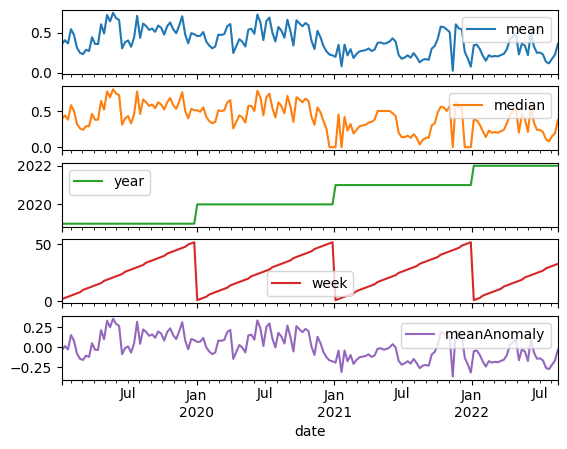

In [7]:
dfregion_1922.plot(subplots=True)

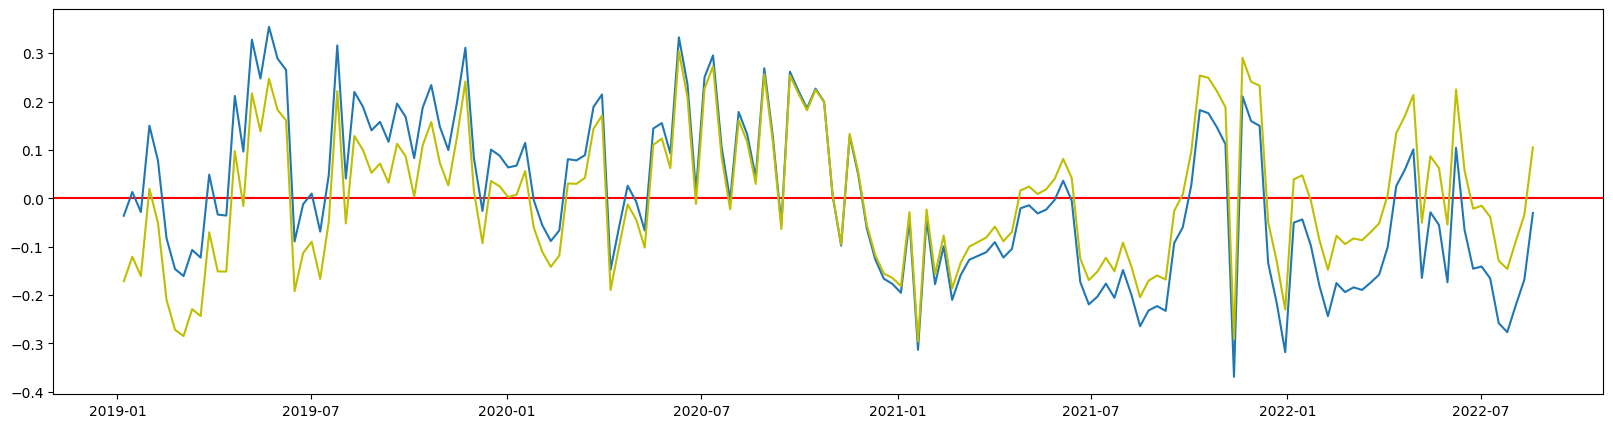

In [8]:
from scipy.signal import detrend

fig,ax= plt.subplots(figsize=(20,5))
ax.axhline(y=0,color='r')
ax.plot(dfregion_1922.index,dfregion_1922['meanAnomaly'])
ax.plot(dfregion_1922.index,detrend(dfregion_1922['meanAnomaly']), color='y')

#### Regression

In [9]:
dfregion_regr_1922 = pd.read_csv("./csv/Emiliani2.csv")
dfregion_regr_1922 = dfregion_regr_1922.rename(columns={'Unnamed: 0': 'date'})
dfregion_regr_1922 = dfregion_regr_1922[dfregion_regr_1922['year'] >= 2019].copy()
dfregion_regr_1922 = dfregion_regr_1922.reset_index(drop = True)

meanOfMean = dfregion_regr_1922['mean'].mean()
dfregion_regr_1922['meanAnomaly'] = dfregion_regr_1922['mean'].subtract(meanOfMean)

In [10]:
y = dfregion_regr_1922['meanAnomaly']
X = dfregion_regr_1922.index.values
X = X.reshape(X.shape[0], 1)

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X, y)

# predicted_y = regression.predict(test_input)
# r2 = regression.score(test_input, testdf)

print('Coefficients: \n', '{:.20f}'.format(regression.coef_[0]), regression.intercept_)

Coefficients: 
 -0.00164329299698959133 0.1355716722516412


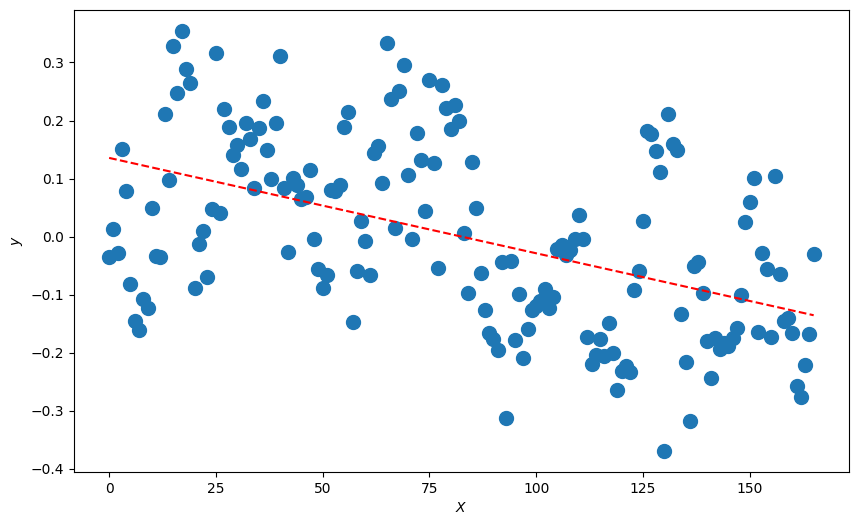

In [11]:
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
best_fit = regression.intercept_ + regression.coef_[0] * X

ax_scat.scatter(X, y, s=100, label='Data')
ax_scat.plot(X, best_fit, ls='--', label='Best Fit Line', color='red')

ax_scat.set_xlabel(r'$X$')
ax_scat.set_ylabel(r'$y$');

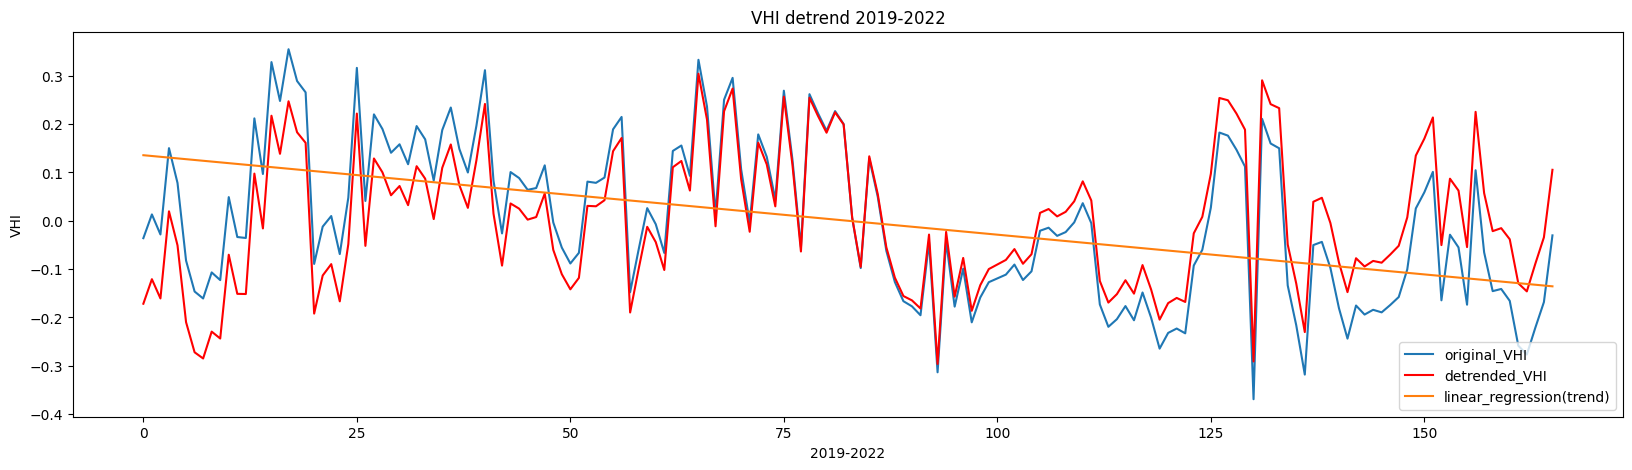

In [20]:
trend = regression.predict(X)
detrended = [y[i]-trend[i] for i in range(0, len(X))]

plt.plot(y, label = "original_VHI")
plt.plot(detrended, color='red', label = "detrended_VHI")
plt.plot(trend, label="linear_regression(trend)")
plt.rcParams["figure.figsize"] = (20,5)

plt.xlabel("2019-2022")
plt.ylabel("VHI")
plt.title("VHI detrend 2019-2022")

plt.legend(loc="lower right")

plt.show()

### Stationarity tests (KPSS failed)

In [83]:
adf_test(dfregion_regr_1922['meanAnomaly']) # for stationarity: p_value < 0.05

Results of Dickey-Fuller Test:
ADF Statistic: -3.463612
p-value: 0.008972
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576


In [84]:
kpss_test(dfregion_regr_1922['meanAnomaly']) # for stationarity: p_value > 0.05

Results of KPSS Test:
Test Statistic                         0.974232
p-value                                    0.01
#Lags Used                                  8.0
Critical Value (10%)     0.34699999999999997513
Critical Value (5%)      0.46300000000000002265
Critical Value (2.5%)    0.57399999999999995470
Critical Value (1%)      0.73899999999999999023
dtype: object


/Users/veronica/anaconda3/envs/openeo/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Detrending by Differencing
To fix the non stationarity of KPSS test

<AxesSubplot: >

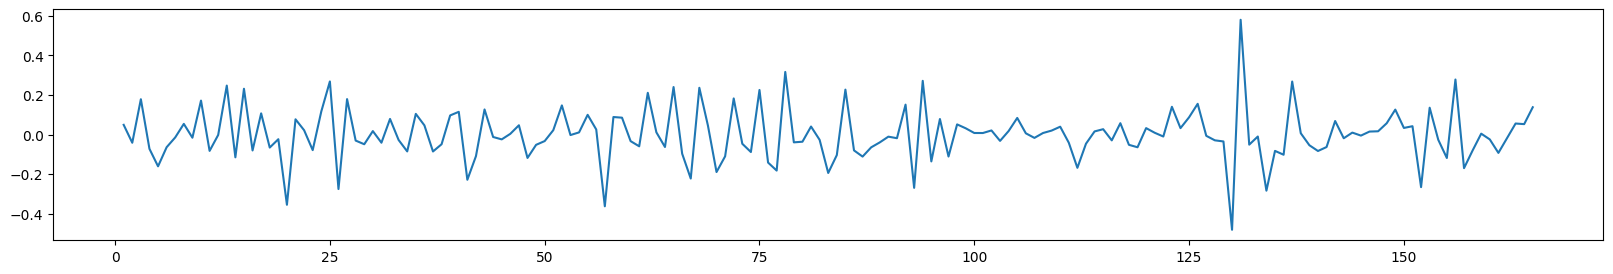

In [86]:
dfregion_regr_1922['mean_diff'] = dfregion_regr_1922['mean'] - dfregion_regr_1922['mean'].shift(1)
dfregion_regr_1922['mean_diff'].dropna().plot(figsize=(20, 3))

In [88]:
adf_test(dfregion_regr_1922['mean_diff'].dropna()) # for stationarity: p_value < 0.05

Results of Dickey-Fuller Test:
ADF Statistic: -8.339452
p-value: 0.000000
Critical Values:
	1%: -3.472
	5%: -2.880
	10%: -2.576


In [90]:
kpss_test(dfregion_regr_1922['mean_diff'].dropna()) # for stationarity: p_value > 0.05

Results of KPSS Test:
Test Statistic                         0.055797
p-value                                     0.1
#Lags Used                                 13.0
Critical Value (10%)     0.34699999999999997513
Critical Value (5%)      0.46300000000000002265
Critical Value (2.5%)    0.57399999999999995470
Critical Value (1%)      0.73899999999999999023
dtype: object


/Users/veronica/anaconda3/envs/openeo/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
